In [13]:
import matplotlib.pyplot as plt
import os
height = 10
width = height*0.6
plt.rcParams["figure.figsize"] = (height,width)
import numpy as np
plt.style.use('seaborn-colorblind')

target_directory = "../Experiments/Branched-ResNet18-CIFAR10/version_0/"

try:
    os.mkdir(target_directory + 'figures/')
    print('Figure Folder Created..')
except FileExistsError:
    print('Figure Folder Exists..')

Figure Folder Exists..


In [14]:
# std mean abs_mean L1 L2

parameter_counts = np.load(target_directory+"/tracked_parameters/parameter_counts.npy")
gradients = np.load(target_directory+"/tracked_parameters/tracked_gradients.npy")[:,:,1:]
weights = np.load(target_directory+"/tracked_parameters/tracked_weights.npy")[:,:,1:]
num_layers = gradients.shape[1]
num_epochs = gradients.shape[2]

epochs = np.arange(0,num_epochs)

print("parameter shape:", gradients.shape)

print("number of layers:", num_layers)
print("layer parameter counts:", parameter_counts)
print("number of epochs:", num_epochs)


parameter shape: (5, 18, 988)
number of layers: 18
layer parameter counts: [   1728   36864   36864   36864   36864   73728  147456  147456  147456
  294912  589824  589824  589824 1179648 2359296 2359296 2359296    5120]
number of epochs: 988


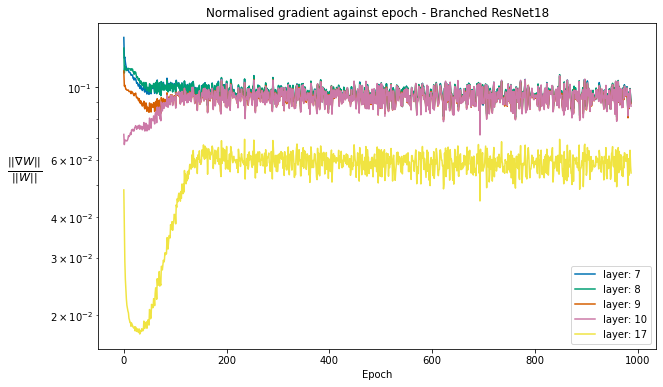

In [21]:
indices18 = [6,7,8,9,16]
value = 1
color = 0
for layer in indices18:
    plt.plot(epochs, np.abs(gradients[4,layer,:])/weights[4,layer,:], label=('layer: '+str(layer+1)), color=('C'+str(color)))
    #plt.plot(epochs, gradients[0,layer,:]/weights[4,layer,:],'-.', color=('C'+str(color)))
    #plt.plot(epochs, gradients[1,layer,:]/parameter_counts[layer], label=('layer: '+str(layer)))
    color = color+1
plt.title("Normalised gradient against epoch - Branched ResNet18")
plt.ylabel(r"$\frac{||\nabla W||}{||W||}$",rotation=0, fontsize=16, labelpad=25)
plt.xlabel('Epoch')
plt.yscale('log')
plt.legend()
plt.show()

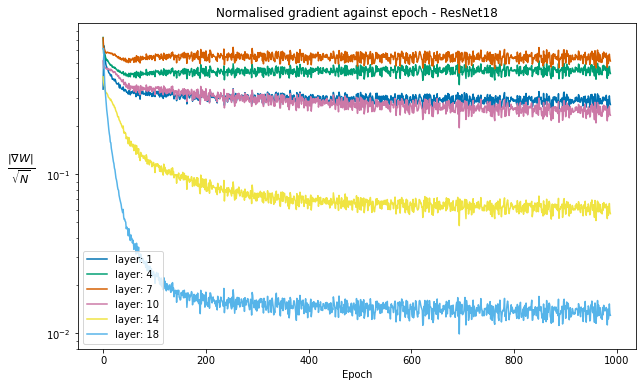

In [16]:
indices18 = [0,3,6,9,13,17]
color = 0
for layer in indices18:
    plt.plot(epochs, np.abs(gradients[3,layer,:])/np.sqrt(parameter_counts[layer]), label=('layer: '+str(layer+1)), color=('C'+str(color)))
#     plt.plot(epochs, gradients[0,layer,:]/weights[4,layer,:],'-.', color=('C'+str(color)))
    #plt.plot(epochs, gradients[1,layer,:]/parameter_counts[layer], label=('layer: '+str(layer)))
    color = color+1
plt.title("Normalised gradient against epoch - ResNet18")
plt.ylabel(r"$\frac{|\nabla W|}{\sqrt{N}}$",rotation=0, fontsize=16, labelpad=25)
plt.xlabel('Epoch')
plt.yscale('log')
plt.legend()
plt.show()

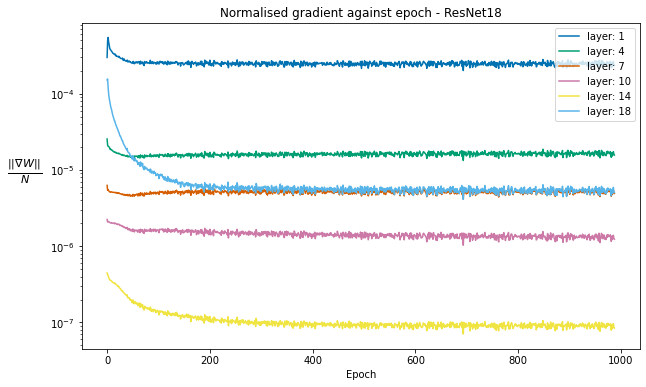

In [17]:
indices18 = [0,3,6,9,13,17]
color = 0
for layer in indices18:
    plt.plot(epochs, np.abs(gradients[4,layer,:])/parameter_counts[layer], label=('layer: '+str(layer+1)), color=('C'+str(color)))
#     plt.plot(epochs, gradients[0,layer,:]/weights[4,layer,:],'-.', color=('C'+str(color)))
    #plt.plot(epochs, gradients[1,layer,:]/parameter_counts[layer], label=('layer: '+str(layer)))
    color = color+1
plt.title("Normalised gradient against epoch - ResNet18")
plt.ylabel(r"$\frac{||\nabla W||}{N}$",rotation=0, fontsize=16, labelpad=25)
plt.xlabel('Epoch')
plt.yscale('log')
plt.legend()
plt.show()

In [43]:
from numpy import genfromtxt
training_information_dir = target_directory+'training_information/run-ResNet18-CIFAR10_version_5-'
learning_rate = genfromtxt(training_information_dir+'tag-lr-SGD.csv', delimiter=',')
epochs = np.arange(learning_rate.shape[0])
print(learning_rate.shape)

plt.plot(epochs,learning_rate[:,2])
plt.xlabel("Epoch")
plt.ylabel("Log of learning rate")
plt.yscale('log')
plt.show()

from numpy import genfromtxt
training_information_dir = target_directory+'training_information/run-ResNet18-CIFAR10_version_6-'
learning_rate = genfromtxt(training_information_dir+'tag-lr-SGD.csv', delimiter=',')
epochs = np.arange(learning_rate.shape[0])
print(learning_rate.shape)

plt.plot(epochs,learning_rate[:,2])
plt.xlabel("Epoch")
plt.ylabel("Learning rate")
plt.show()



OSError: ../Experiments/ResNet18-CIFAR10/version_13/training_information/run-ResNet18-CIFAR10_version_5-tag-lr-SGD.csv not found.